# Modelling

## Eval Function

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8), color = 'darkorange')
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## Baseline

In [76]:
from sklearn.model_selection import train_test_split

X = df_encode_bl.drop('is_canceled', axis = 1)
y = df_encode_bl['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter = 1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
eval_classification(lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.78
Recall (Test Set): 0.70
F1-Score (Test Set): 0.74
AUC: 0.79


### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.81
Recall (Test Set): 0.82
F1-Score (Test Set): 0.81
AUC: 0.85


#### Hyperparameter Tuning

In [186]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion = criterion,
                       splitter = splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42,  verbose = 10)
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best
[CV 1/5; 1/10] END criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best; total time=   0.4s
[CV 2/5; 1/10] START criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best
[CV 2/5; 1/10] END criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best; total time=   0.4s
[CV 3/5; 1/10] START criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best
[CV 3/5; 1/10] END criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=100, splitter=best; total time=   0.4s
[CV 4/5; 1/10] START criterion=entropy, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_

### Adaboost

In [187]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.82
Recall (Test Set): 0.71
F1-Score (Test Set): 0.76
AUC: 0.81


### Random Forest (FIX MODEL)

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.89
Recall (Test Set): 0.81
F1-Score (Test Set): 0.85
AUC: 0.87


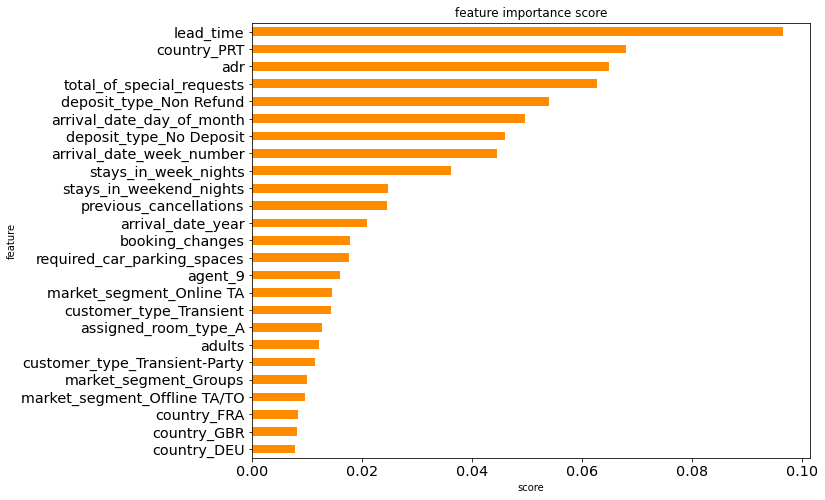

In [92]:
show_feature_importance(rf)

### Model Interpretation

In [ ]:
import shap
from shap import summary_plot

explainer = shap.Explainer(rf)
shap_values = explainer(X)

In [ ]:
# user who canceled

shap.plots.waterfall(shap_values[4])

#### Hyperparameter Tuning

In [189]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42,verbose=10)
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1
[CV 1/5; 1/10] END bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1; total time= 1.2min
[CV 2/5; 1/10] START bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1
[CV 2/5; 1/10] END bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1; total time= 1.1min
[CV 3/5; 1/10] START bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1
[CV 3/5; 1/10] END bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=5, min_samp

### XGBoost

In [190]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.86
Recall (Test Set): 0.81
F1-Score (Test Set): 0.83
AUC: 0.86


## Scenario 0

Data yang digunakan adalah raw data yang hanya dilakukan data cleansing + feature engineering

In [126]:
from sklearn.model_selection import train_test_split

X = df_encode_0.drop('is_canceled', axis = 1)
y = df_encode_0['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
eval_classification(lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.74
Recall (Test Set): 0.52
F1-Score (Test Set): 0.61
AUC: 0.70


### Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.77
Recall (Test Set): 0.77
F1-Score (Test Set): 0.77
AUC: 0.81


### Adaboost

In [129]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.78
Recall (Test Set): 0.62
F1-Score (Test Set): 0.69
AUC: 0.75


### Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.86
Recall (Test Set): 0.72
F1-Score (Test Set): 0.78
AUC: 0.82


### XGBoost

In [131]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.80
Recall (Test Set): 0.79
F1-Score (Test Set): 0.79
AUC: 0.83


## Scenario 1

Data yang dilakukan cleaning, handling invalid values, duplicate data, handling outliers, feature engineering, feature selection, normalization / standarization dan feature encoding

In [132]:
from sklearn.model_selection import train_test_split

X = df_encode.drop('is_canceled', axis = 1)
y = df_encode['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
eval_classification(lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.70
Recall (Test Set): 0.46
F1-Score (Test Set): 0.55
AUC: 0.66


### Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.72
Recall (Test Set): 0.73
F1-Score (Test Set): 0.72
AUC: 0.77


### Adaboost

In [135]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.75
Recall (Test Set): 0.59
F1-Score (Test Set): 0.66
AUC: 0.73


### Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.83
Recall (Test Set): 0.69
F1-Score (Test Set): 0.75
AUC: 0.80


### XGBoost

In [137]:
for i in X_train.columns:
    if X_train[i].dtypes == 'O':
        print(i)

In [138]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.77
Recall (Test Set): 0.78
F1-Score (Test Set): 0.78
AUC: 0.81


## Scenario 2

In [139]:
from sklearn.model_selection import train_test_split

X = df_encode_2.drop('is_canceled', axis = 1)
y = df_encode_2['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
eval_classification(lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.74
Recall (Test Set): 0.52
F1-Score (Test Set): 0.61
AUC: 0.70


### Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.77
Recall (Test Set): 0.77
F1-Score (Test Set): 0.77
AUC: 0.81


### Adaboost

In [142]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.78
Recall (Test Set): 0.62
F1-Score (Test Set): 0.69
AUC: 0.75


### Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.86
Recall (Test Set): 0.72
F1-Score (Test Set): 0.78
AUC: 0.82


### XGBoost

In [144]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42, eval_metric = 'logloss', use_label_encoder = False)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.80
Recall (Test Set): 0.79
F1-Score (Test Set): 0.79
AUC: 0.83
